In [1]:
import os #cmd line library
#\\ is a windows thing, on linux paths are /
data_folder = "C:\Users\story645\Desktop\gcdrb_sessions\data"
print(data_folder)
data_path = os.path.join(data_folder, 'nyc_2005_2015.csv')
print(data_path)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-1-59e3b40fb889>, line 3)

In [2]:
import os #cmd line library
#fix unicode escape error by replacing \ with \\ 
#is a windows thing, on linux paths are /
data_folder = "C:\\Users\\story645\\Desktop\\gcdrb_sessions\\data"
print(data_folder)
data_path = os.path.join(data_folder, 'nyc_2005_2015.csv')
print(data_path)

C:\Users\story645\Desktop\gcdrb_sessions\data
C:\Users\story645\Desktop\gcdrb_sessions\data\nyc_2005_2015.csv


In [3]:
import pandas as pd
weather = pd.read_csv(data_path)

In [4]:
weather.head(2)

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
0,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050601,152,0,528,0,350,117,260,173,217
1,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050701,439,0,1324,0,333,161,283,205,244


In [5]:
print(weather['TSNW'].max())
print(weather['TSNW'].mean())

1023
-1833.0578461538462


In [6]:
weather['TSNW'].describe()

count    1625.000000
mean    -1833.057846
std      3928.840691
min     -9999.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1023.000000
Name: TSNW, dtype: float64

In [7]:
import numpy as np

In [8]:
1>2

False

In [9]:
b = np.array(([[1,2,3],[4,5,6],[7,8,9]]))
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [10]:
b>2 #boolean mask

array([[False, False,  True],
       [ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

In [11]:
b[b>2] # [ means subsetting->get out little piece of whole]

array([3, 4, 5, 6, 7, 8, 9])

In [12]:
b[b<4]

array([1, 2, 3])

In [13]:
b[b==2]

array([2])

In [14]:
weather=-9999.0

In [15]:
weather[weather==-9999.0]

TypeError: 'float' object is not subscriptable

In [16]:
weather = pd.read_csv(data_path)

In [17]:
weather.head(2)

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
0,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050601,152,0,528,0,350,117,260,173,217
1,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050701,439,0,1324,0,333,161,283,205,244


In [18]:
import numpy as np
print(np.nan)

nan


In [19]:
weather[weather==-9999.00]= np.nan

In [20]:
weather['TSNW'].tail()

1620   NaN
1621   NaN
1622   NaN
1623   NaN
1624   NaN
Name: TSNW, dtype: float64

In [21]:
weather_2 = weather.copy()

In [22]:
weather_2['TSNW'][weather_2['TSNW']==0] = 'NO SNOW'

C:\Users\story645\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
weather_2['TSNW'][2:10:2]

2    NO SNOW
4    NO SNOW
6        127
8        427
Name: TSNW, dtype: object

In [24]:
weather['TSNW'].describe()

count    1320.000000
mean       53.769697
std       151.237483
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max      1023.000000
Name: TSNW, dtype: float64

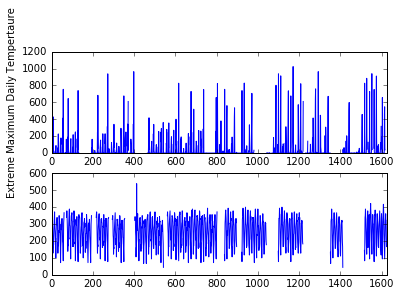

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(2,1,1) #location of picture on grid
weather['TSNW'].plot(ax=ax)
ax.set_ylabel("Total Snowfall (inchs)")
ax2 = fig.add_subplot(2,1,2) #location of picture on grid
weather['EMXT'].plot(ax=ax2)
ax.set_ylabel("Extreme Maximum Daily Tempertaure")

In [26]:
weather[['TSNW', 'EMXT']].head()

,TSNW,EMXT
0,0,350
1,0,333
2,0,356
3,0,322
4,0,244


In [27]:
weather['TSNW', 'EMXT'].head()

KeyError: ('TSNW', 'EMXT')

In [28]:
weather[['TSNW', 'EMXT']].head()

,TSNW,EMXT
0,0,350
1,0,333
2,0,356
3,0,322
4,0,244


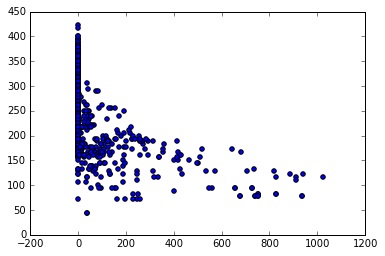

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(weather['TSNW'],weather['EMXT'])

In [30]:
weather['DATE'].head(3)

0    20050601
1    20050701
2    20050801
Name: DATE, dtype: int64

In [31]:
#use Python datetime strptime
from datetime import datetime 

In [32]:
x = 20050601
print(datetime.strptime(str(x),'%Y%m%d'))
print(datetime.strptime(str(x),'%Y%d%m'))
x = '050601'
print(datetime.strptime(x,'%y%m%d'))

2005-06-01 00:00:00
2005-01-06 00:00:00
2005-06-01 00:00:00


In [33]:
#use Python datetime strptime
from datetime import datetime 
"""the apply method applies the function 
that's passed inas an argument to every 
element in the column it's applied to
"""
def ds2dt(x):
    return datetime.strptime(str(x),'%Y%m%d')

parsed_date = weather['DATE'].apply(ds2dt)

In [34]:
print(parsed_date[:5])

0   2005-06-01
1   2005-07-01
2   2005-08-01
3   2005-09-01
4   2005-10-01
Name: DATE, dtype: datetime64[ns]


In [35]:
weather['DATE']=parsed_date

In [37]:
weather['DATE'].head()

0   2005-06-01
1   2005-07-01
2   2005-08-01
3   2005-09-01
4   2005-10-01
Name: DATE, dtype: datetime64[ns]

In [49]:
SN='NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US' 
jfk = weather[['DATE','TSNW']][weather['STATION_NAME']==SN]

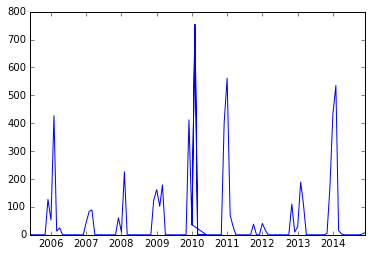

In [54]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot_date(jfk['DATE'], jfk['TSNW'],'-')

In [56]:
weather.groupby('STATION_NAME')

In [64]:
weather.groupby(['STATION_NAME']).describe().head()

EMNT        EMXP  EMXT  MMNT  MMXT  MNTM  \
STATION_NAME                                                             
BETHPAGE 0.9 NNW NY US count     0   17.000000     0     0     0     0   
                       mean    NaN  287.529412   NaN   NaN   NaN   NaN   
                       std     NaN  194.009380   NaN   NaN   NaN   NaN   
                       min     NaN    3.000000   NaN   NaN   NaN   NaN   
                       25%     NaN  193.000000   NaN   NaN   NaN   NaN   

                                   MXSD        TPCP       TSNW  
STATION_NAME                                                    
BETHPAGE 0.9 NNW NY US count   9.000000   17.000000  17.000000  
                       mean   59.333333  777.588235  14.882353  
                       std    95.328380  472.984812  33.631983  
                       min     0.000000    3.000000   0.000000  
                       25%     0.000000  527.000000   0.000000

In [66]:
weather['MONTH'] = weather['DATE'].map(lambda x: x.month)

In [67]:
weather_pivot = weather.pivot_table(index='MONTH', 
            columns='STATION_NAME', 
            aggfunc={'EMNT':'min', 'EMXT':'max'})

In [69]:
weather_pivot

EMXT                                    \
STATION_NAME BETHPAGE 0.9 NNW NY US BRONX NY US BROOKLYN 2.4 SW NY US   
MONTH                                                                   
1                               NaN         217                   NaN   
2                               NaN         194                   NaN   
3                               NaN         256                   NaN   
4                               NaN         344                   NaN   
5                               NaN         356                   NaN   
6                               NaN         378                   NaN   
7                               NaN         383                   NaN   
8                               NaN         389                   NaN   
9                               NaN         356                   NaN   
10                              NaN         317                   NaN   
11                              NaN         239                   NaN   
12                              NaN         206                   NaN   

                                                     \
STATION_NAME BROOKLYN 3.1 NW NY US CENTERPORT NY US   
MONTH                                                 
1                              NaN              217   
2                              NaN              189   
3                              NaN              244   
4                              NaN              328   
5                              NaN              339   
6                              NaN              350   
7                              NaN              372   
8                              NaN              367   
9                              NaN              339   
10                             NaN              294   
11                             NaN              217   
12                             NaN              183   

                                                                     \
STATION_NAME CHESTNUT RIDGE 0.3 SSW NY US DOBBS FERRY ARDSLEY NY US   
MONTH                                                                 
1                                     NaN                       222   
2                                     NaN                       189   
3                                     NaN                       261   
4                                     NaN                       328   
5                                     NaN                       339   
6                                     NaN                       367   
7                                     NaN                       389   
8                                     NaN                       378   
9                                     NaN                       344   
10                                    NaN                       311   
11                                    NaN                       244   
12                                    NaN                       206   

                                                                         \
STATION_NAME FARMINGDALE REPUBLIC AIRPORT NY US FLORAL PARK 0.4 W NY US   
MONTH                                                                     
1                                           217                     NaN   
2                                           200                     NaN   
3                                           244                     NaN   
4                                           306                     NaN   
5                                           333                     NaN   
6                                           356                     NaN   
7                                           389                     NaN   
8                                           367                     NaN   
9                                           333                     NaN   
10                                          306                     NaN   
11                                          206                     

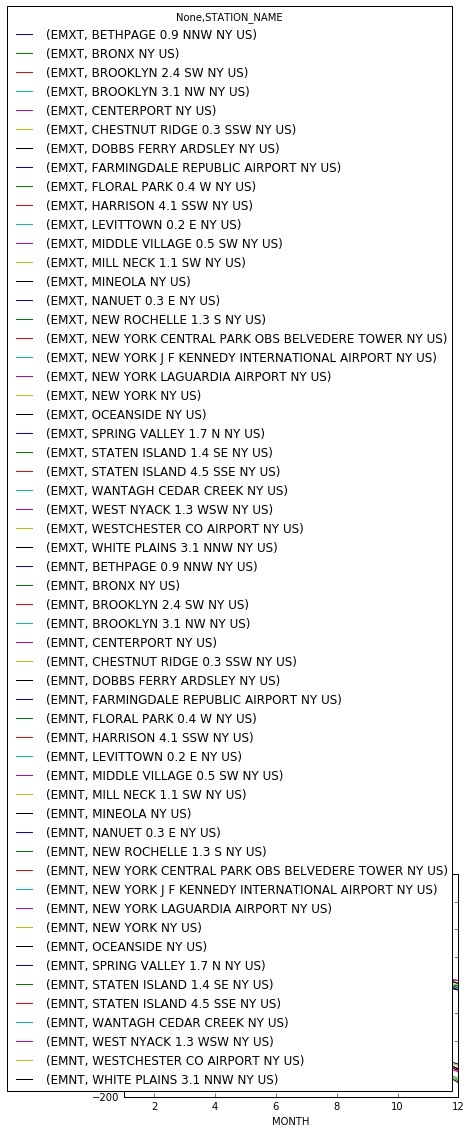

In [70]:
weather_pivot.plot()

(1, 12)

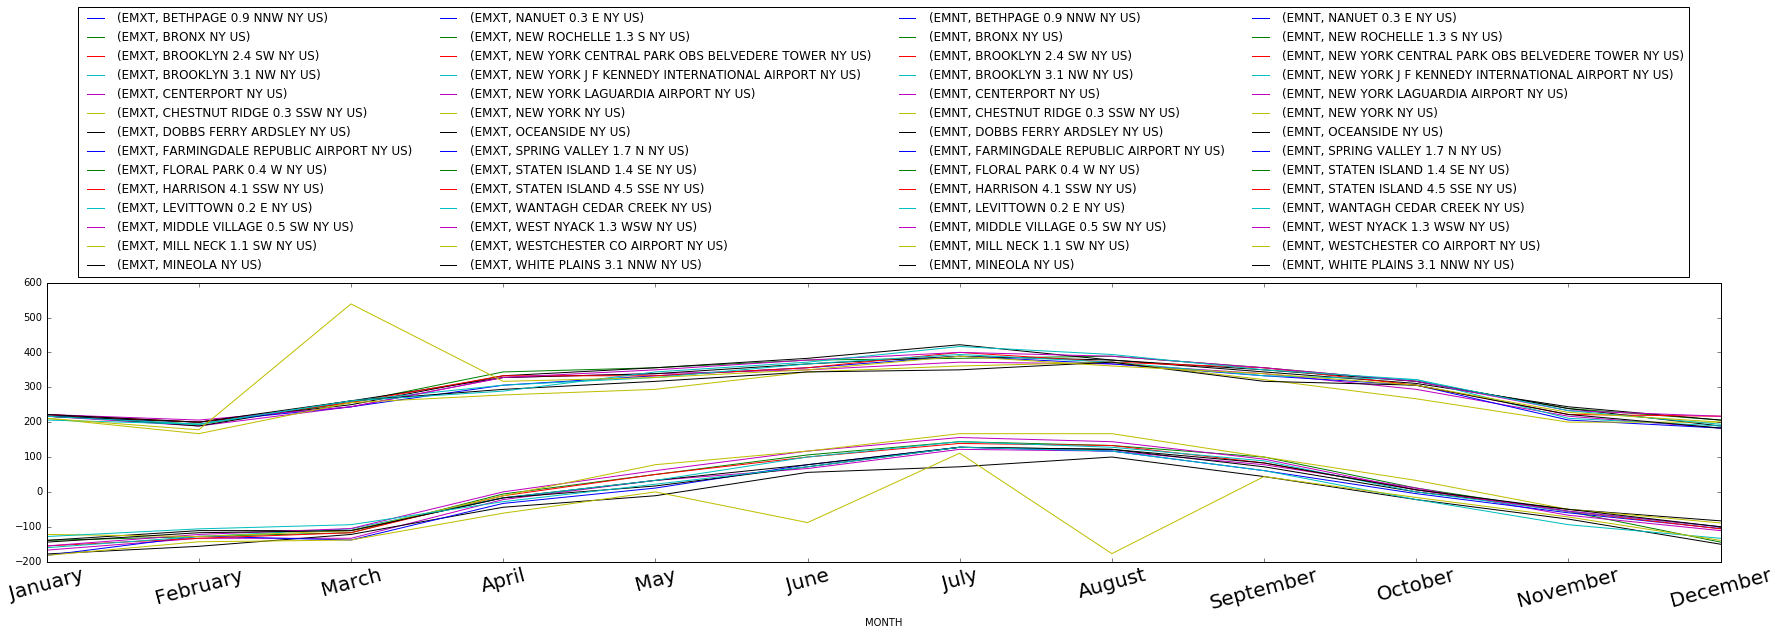

In [78]:
import matplotlib.pyplot as plt
import calendar 
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(1,1,1)

weather_pivot.plot(ax=ax)

ax.legend(bbox_to_anchor=(0.5, 1.), 
          loc=8, ncol=4)
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(calendar.month_name[1:], 
                   rotation=15, fontsize=20)
ax.set_xlim((1,12))

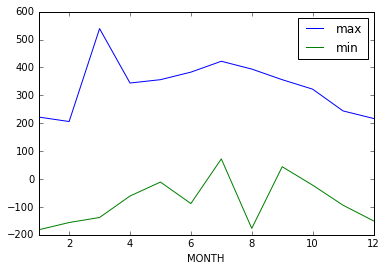

In [79]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
weather_pivot['EMXT'].max(axis=1).plot(ax=ax, label='max')
weather_pivot['EMNT'].min(axis=1).plot(ax=ax, label='min')
ax.legend()